# Юриков Егор ИУ5-65Б Вариант 17

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [318]:
df = pd.read_csv('FIFA 2018 Statistics.csv')

In [319]:
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [320]:
df.shape

(128, 27)

In [321]:
df.isna().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [322]:
df['Own goals'] = df['Own goals'].fillna(0.0)
df['1st Goal'] = df['1st Goal'].fillna(0.0)
df['Own goal Time'] = df['Own goal Time'].fillna(0.0)

In [323]:
df.isna().sum()

Date                      0
Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
Own goals                 0
Own goal Time             0
dtype: int64

In [324]:
le = LabelEncoder()
df['enc_team'] = le.fit_transform(df[['Team']])
df['enc_opponent'] = le.fit_transform(df[['Opponent']])

d:\Projects\ML\RK2\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\ML\RK2\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [325]:
dum = pd.get_dummies(df[['Round']])

for col in dum:
    df[col] = dum[col]

In [326]:
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Own goals,Own goal Time,enc_team,enc_opponent,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0.0,0.0,23,24,False,False,True,False,False,False
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0.0,0.0,24,23,False,False,True,False,False,False
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0.0,0.0,8,31,False,False,True,False,False,False
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0.0,0.0,31,8,False,False,True,False,False,False
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1.0,90.0,17,13,False,False,True,False,False,False


In [327]:
df['Man of the Match'] = df['Man of the Match'].apply(lambda x: True if x == 'Yes' else False)

In [328]:
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Own goals,Own goal Time,enc_team,enc_opponent,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0.0,0.0,23,24,False,False,True,False,False,False
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0.0,0.0,24,23,False,False,True,False,False,False
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0.0,0.0,8,31,False,False,True,False,False,False
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0.0,0.0,31,8,False,False,True,False,False,False
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1.0,90.0,17,13,False,False,True,False,False,False


In [329]:
df = df.drop(columns=['Date', 'Team', 'Opponent', 'Round', 'PSO'])

In [330]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Man of the Match']), df[['Man of the Match']], test_size=0.2)

In [331]:
svc = SVC()
svc.fit(X_train, y_train)

d:\Projects\ML\RK2\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [332]:
svc_predicted = svc.predict(X_test)

In [333]:
grd = GradientBoostingClassifier()
grd.fit(X_train, y_train)

d:\Projects\ML\RK2\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [334]:
grd_predicted = grd.predict(X_test)

In [335]:
print('SVM')
f1_score(y_true=y_test, y_pred=svc_predicted)

SVM


0.4

In [336]:
print('Gradient Boosting')
f1_score(y_true=y_test, y_pred=grd_predicted)

Gradient Boosting


0.7200000000000001

In [337]:
def draw_roc(y_true, y_score, name):
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

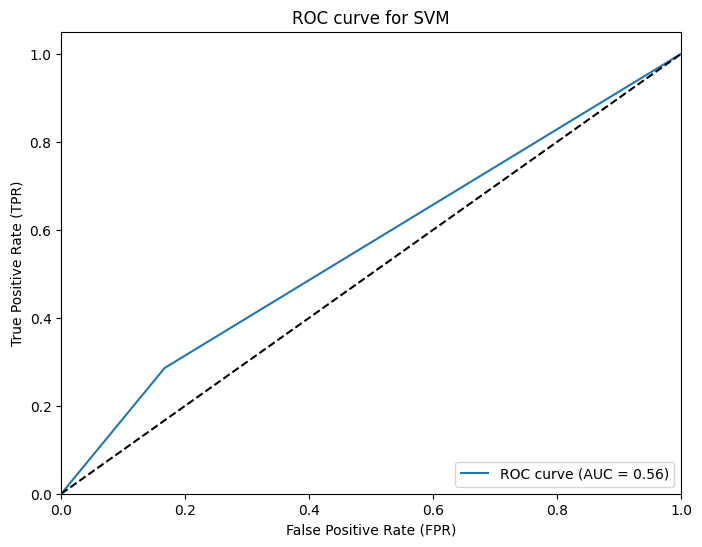

In [338]:
draw_roc(y_true=y_test, y_score=svc_predicted, name='SVM')

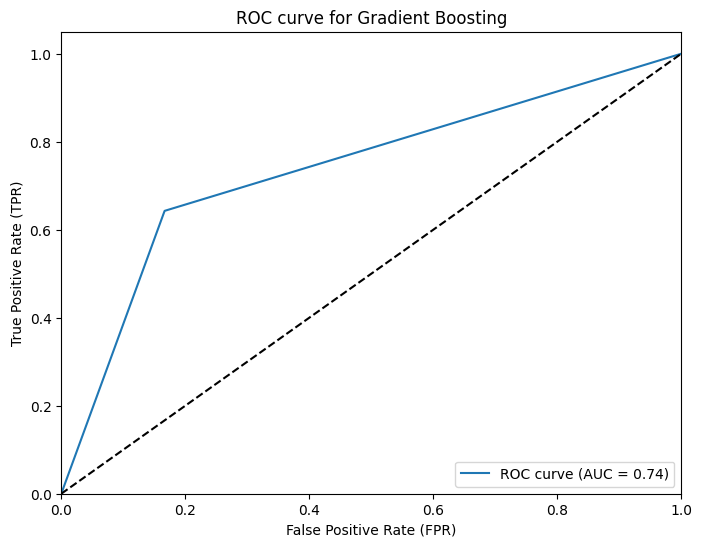

In [339]:
draw_roc(y_true=y_test, y_score=grd_predicted, name='Gradient Boosting')